In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [279]:
df=pd.read_csv('abalone.csv')

In [280]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [281]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns in our data set

In [282]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Sex is categorical data, so we need to label encode that data. All other columns are continuous data and target is discrete

<AxesSubplot:>

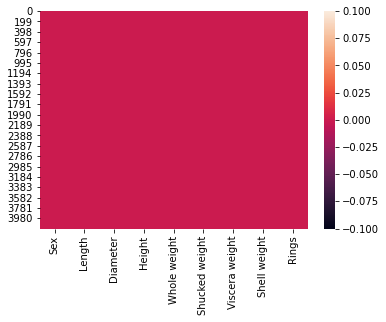

In [283]:
sns.heatmap(df.isnull())

There are no missing values in our dataset

In [284]:
Numerical = df.select_dtypes(include=[np.number]).columns
Categorical = df.select_dtypes(include=[np.object]).columns

In [285]:
from scipy.stats import skew
skew_values = skew(df[Numerical], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(Numerical), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


Height is positively skewed

<AxesSubplot:xlabel='Sex', ylabel='count'>

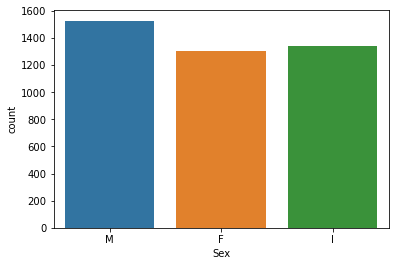

In [286]:
df['Sex'].value_counts()
sns.countplot(df['Sex'])

There are almost eaual number of male,female and infant abalone

<AxesSubplot:xlabel='Height', ylabel='Rings'>

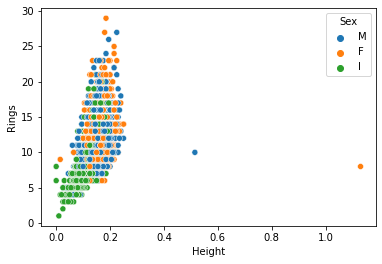

In [287]:
sns.scatterplot(x='Height', y="Rings", data=df, hue="Sex")

We can see Height is less for infants and equally distributed for male and female. There are also some outliers in the data

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

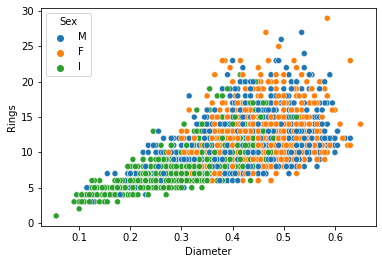

In [288]:
sns.scatterplot(x='Diameter', y="Rings", data=df, hue="Sex")

Diameter is having linear relationship with age.

<AxesSubplot:xlabel='Length', ylabel='Rings'>

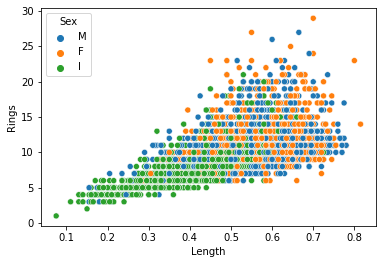

In [289]:
sns.scatterplot(x='Length', y="Rings", data=df, hue="Sex")

Length is less for infants and almost eaual for male and female abalone

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

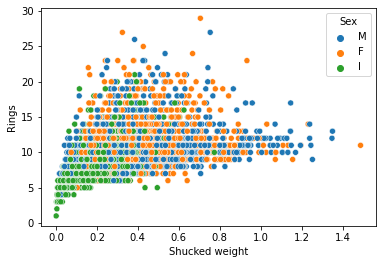

In [290]:
sns.scatterplot(x='Shucked weight', y="Rings", data=df, hue="Sex")

Shucked weight is less for infants and there are few outliers in the data as well

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

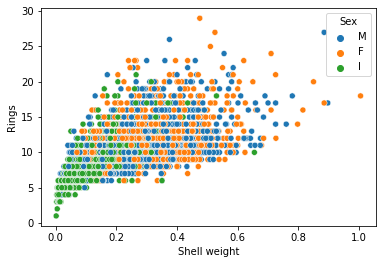

In [291]:
sns.scatterplot(x='Shell weight', y="Rings", data=df, hue="Sex")

There are outliers in the data

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

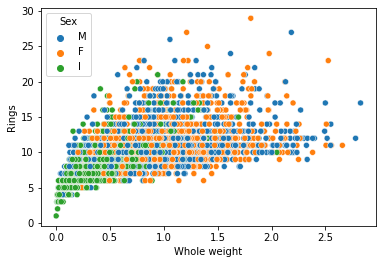

In [292]:
sns.scatterplot(x='Whole weight', y="Rings", data=df, hue="Sex")

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

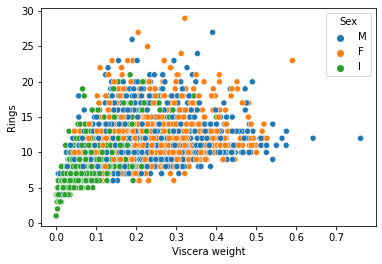

In [293]:
sns.scatterplot(x='Viscera weight', y="Rings", data=df, hue="Sex")

The distribution clearly shows the presence of outliers

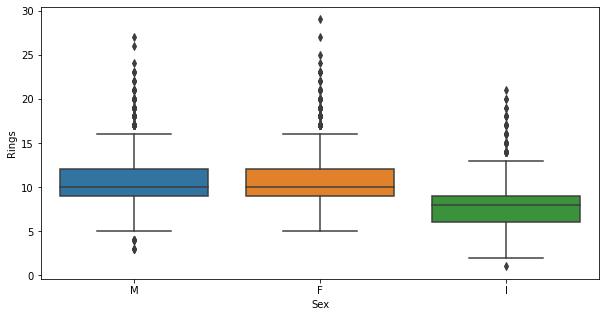

In [294]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Rings'], x=df['Sex'])

plt.show()

We can see number of rings increased with the age. And there are some outliers in Male and female abalone

In [295]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


1. Difference in mean and median suggests data is skewed in Whole weight, shucked weight

2. Difference between 75% and mximum value reveals there are some outliers in the data

In [296]:
#Ordinal Encoding for Sex Column
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df['Sex'] = enc.fit_transform(df['Sex'].values.reshape(-1,1))


In [297]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:>

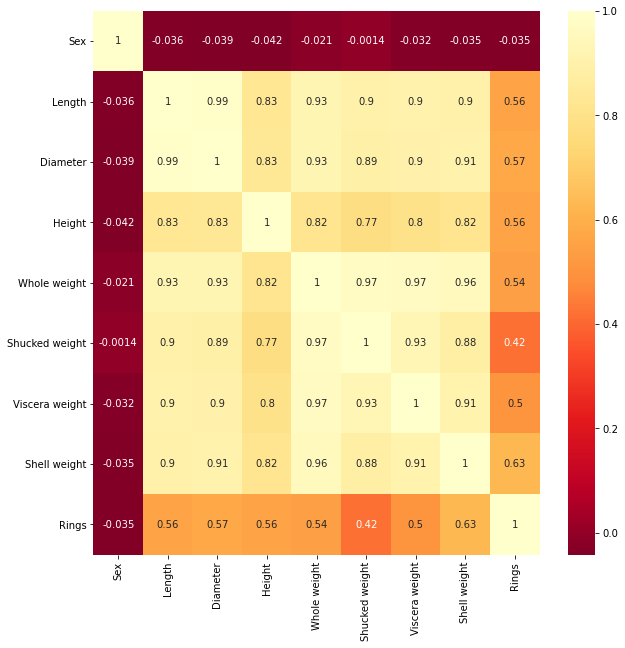

In [298]:
#Multivariate Analysis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

All the columns have good correlation with the target variable,So all the columns are important, we cannot drop them

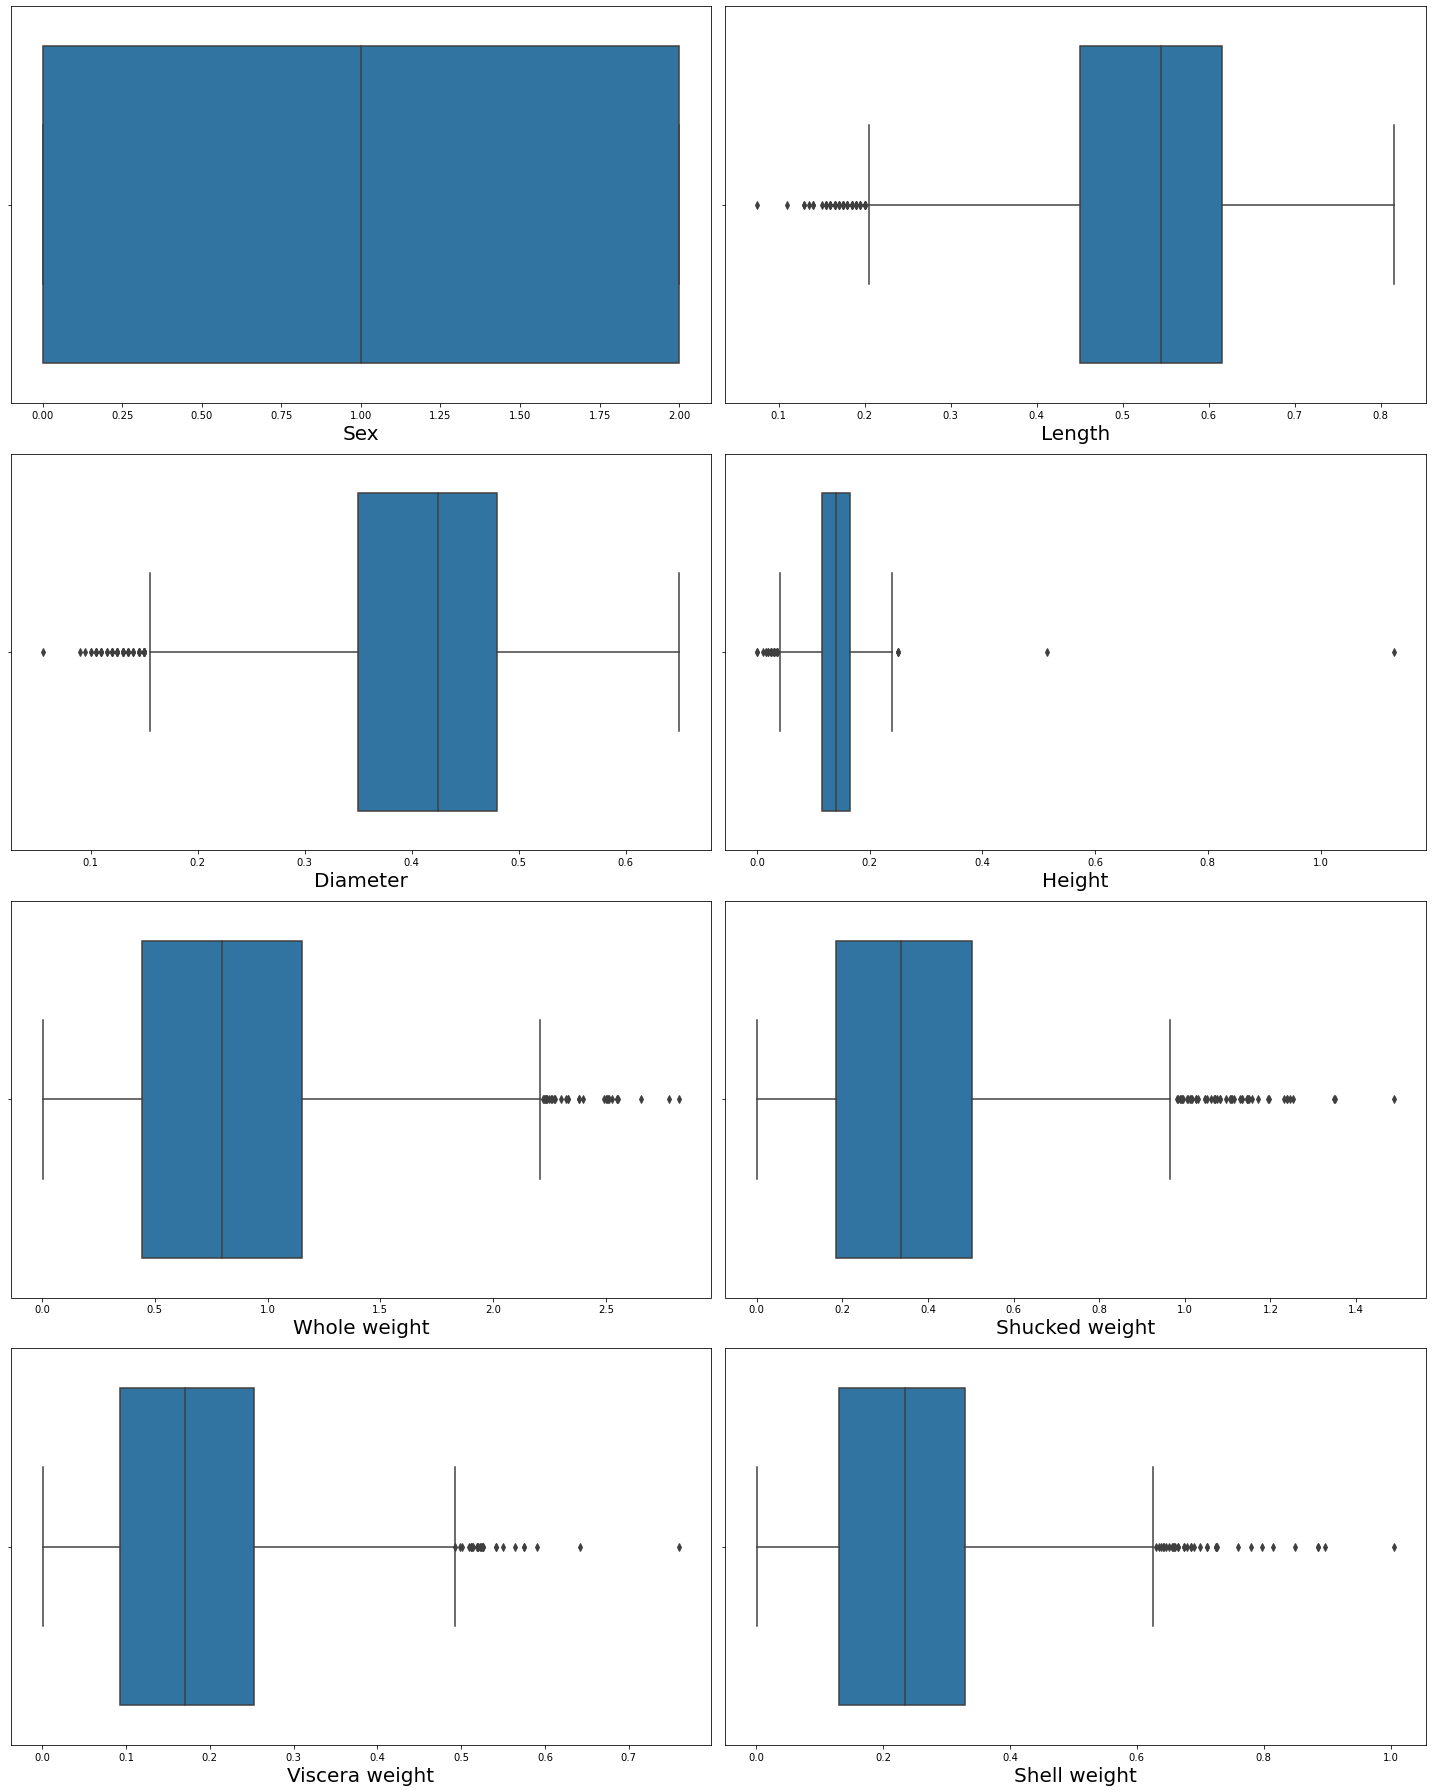

In [299]:
#Univariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()   

We can see there are outliers present in all the columns

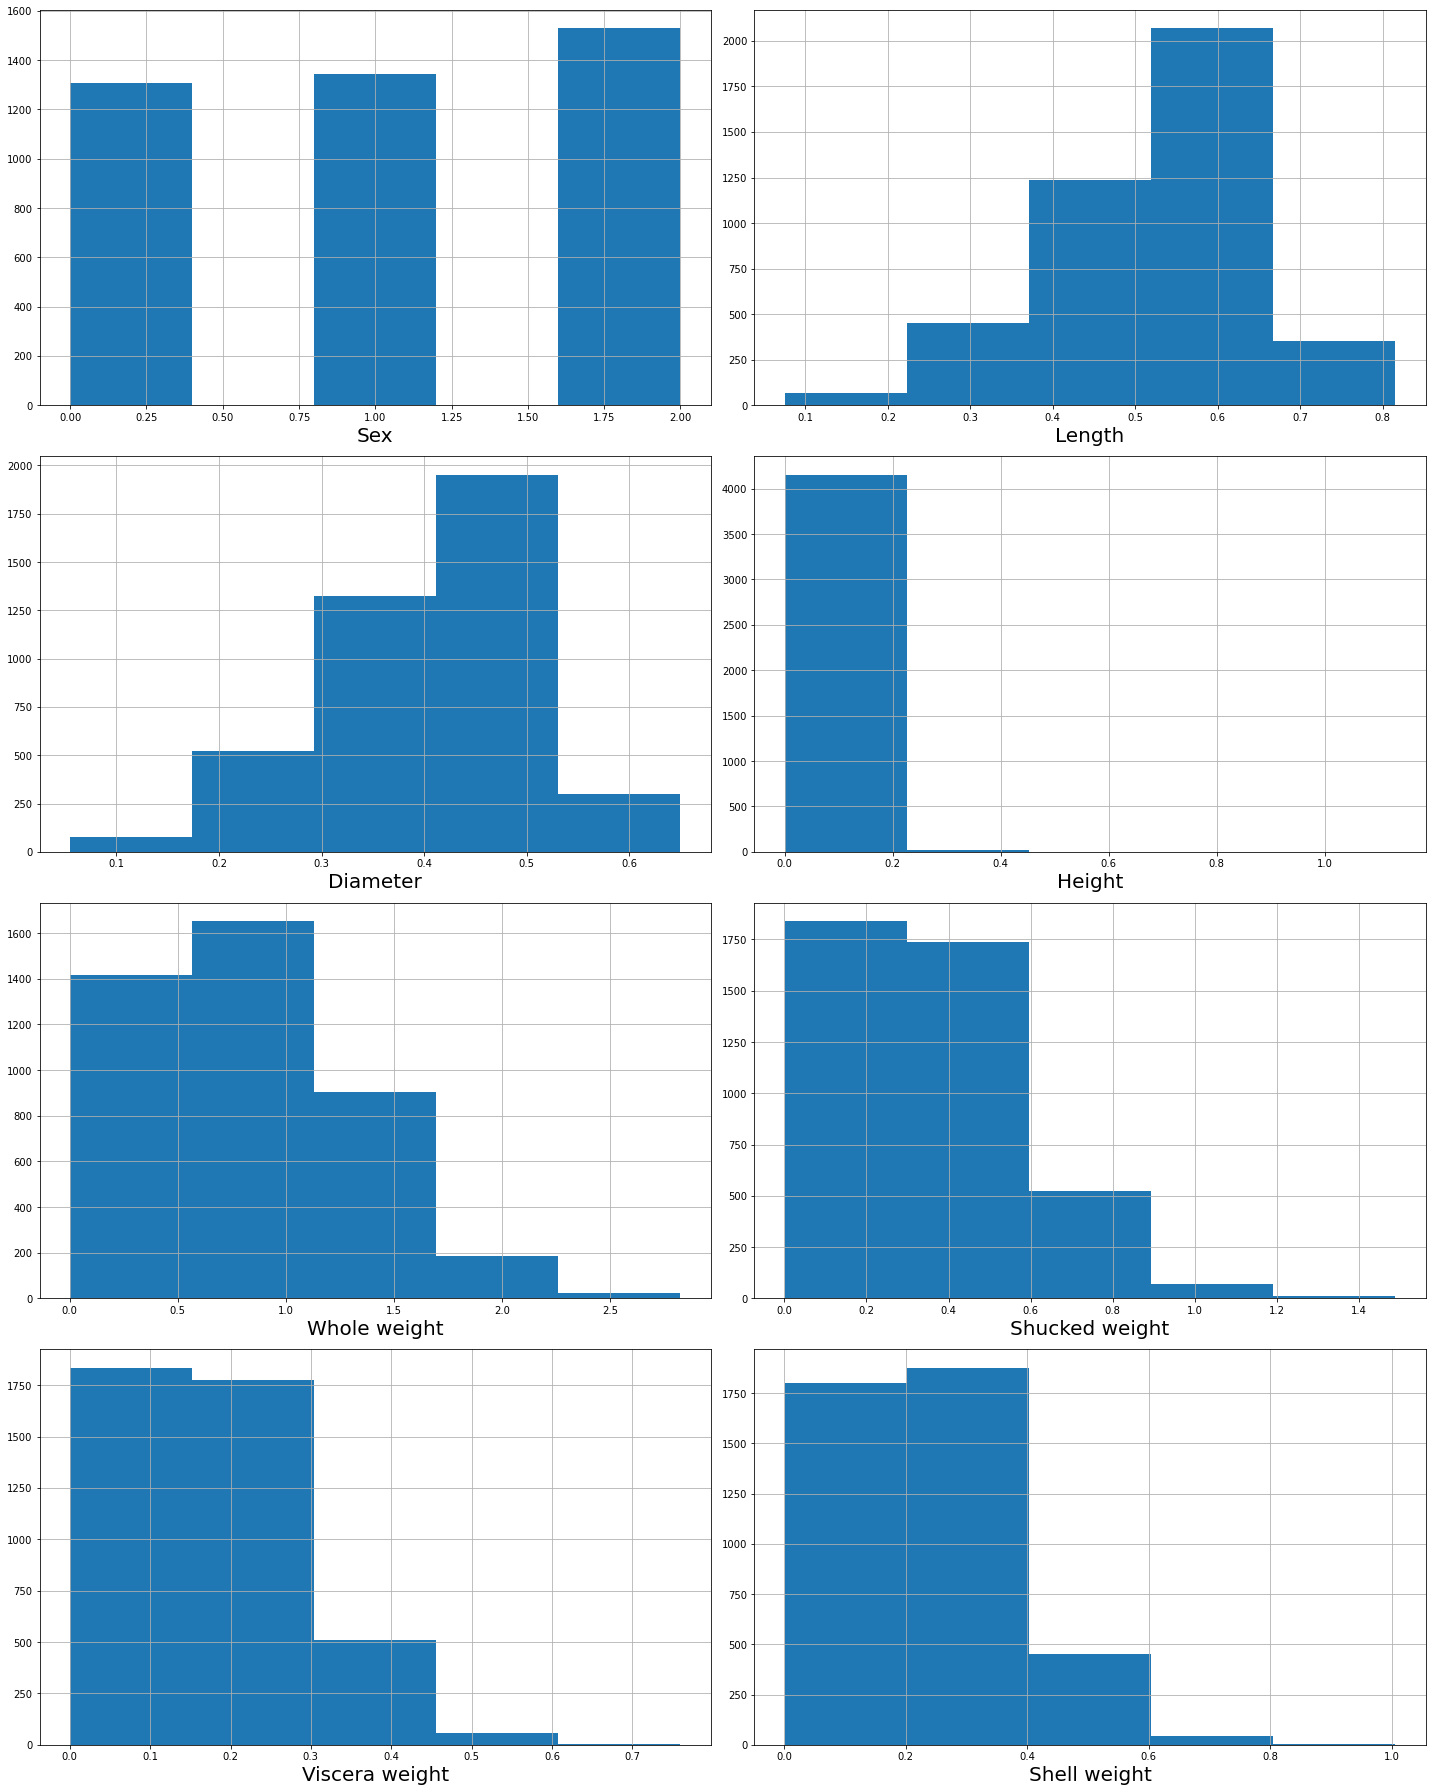

In [300]:
#Bivariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        df[column].hist(bins=5)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

We can see data is left skewed in length and diameter, rest all columns have right skewed data

In [301]:
#REmoving Outliers
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.head()

(4169, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


After removing outliers, we have 4169 rows and 9 columns in our dataset

In [302]:
df.skew()

Sex              -0.099193
Length           -0.644008
Diameter         -0.614493
Height           -0.270983
Whole weight      0.509421
Shucked weight    0.681778
Viscera weight    0.562947
Shell weight      0.574026
Rings             1.038837
dtype: float64

In [303]:
x=df.drop('Rings',axis=1)

In [304]:
y=df[['Rings']]

In [305]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


After removal of outliers and skewness, we can see our data is now normally distributed

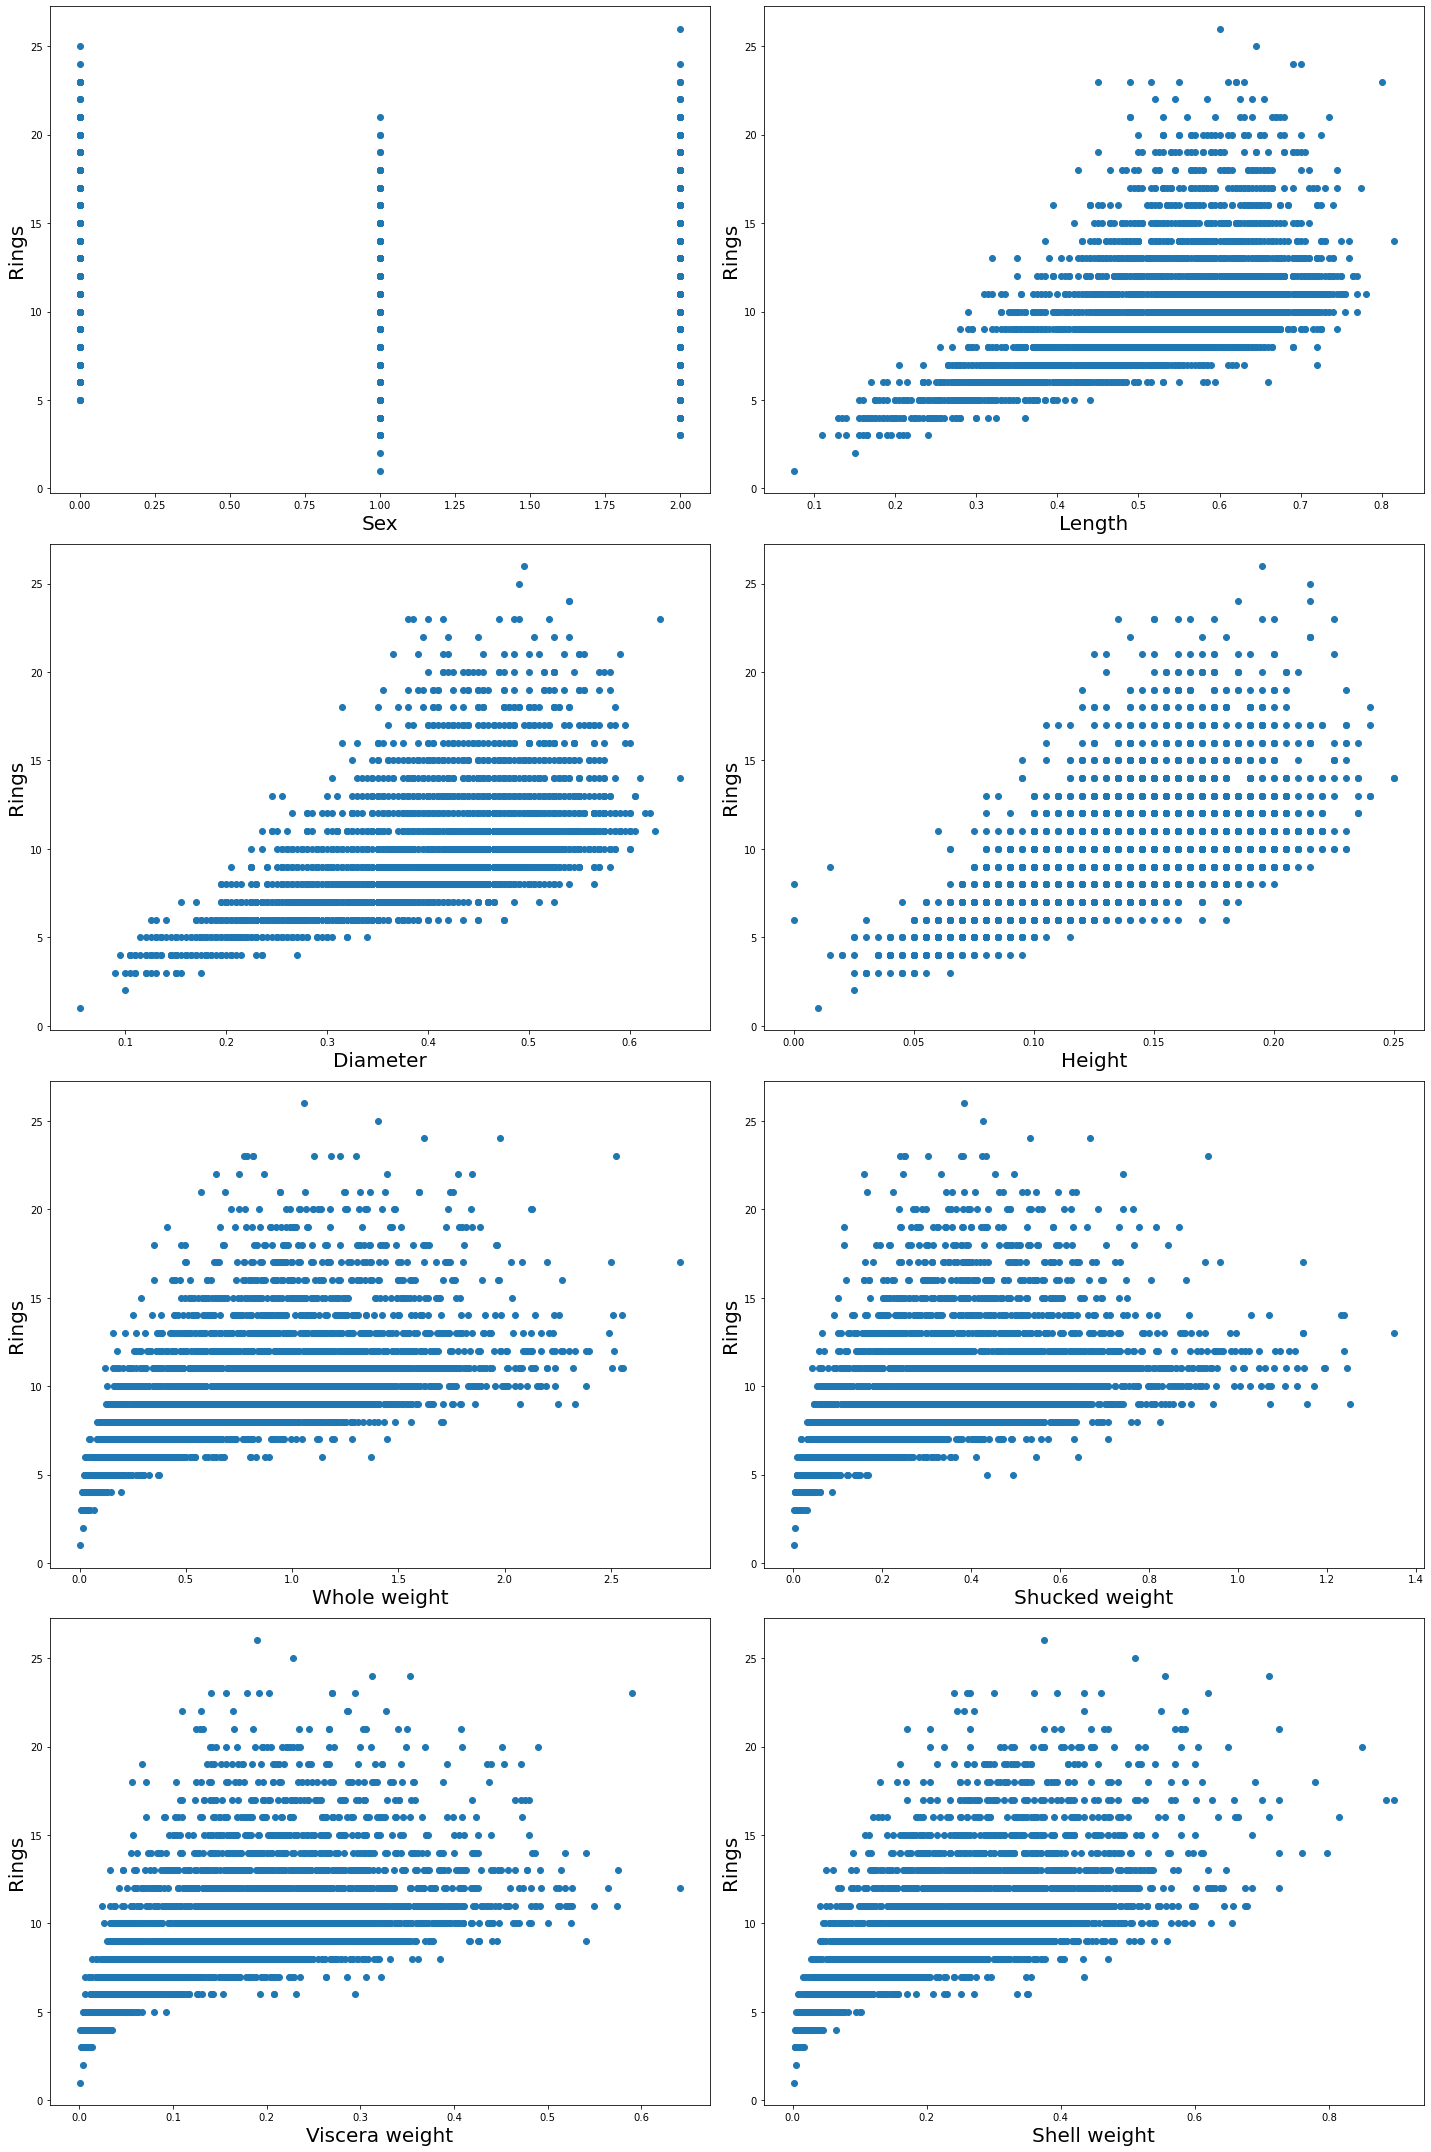

In [306]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rings',fontsize=20)
    plotnumber+=1
plt.tight_layout()   

We can see as the data in all the columns increases, no of rings also increases. So all the columns are positively correlated to our target variable

In [307]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.513514,0.521008,0.38,0.181335,0.165556,0.156786,0.165829
1,1.0,0.371622,0.352941,0.36,0.079157,0.072963,0.074883,0.076494
2,0.0,0.614865,0.613445,0.54,0.239065,0.189259,0.219969,0.232831
3,1.0,0.493243,0.521008,0.50,0.182044,0.158889,0.177067,0.171413
4,0.5,0.344595,0.336134,0.32,0.071897,0.065556,0.060842,0.059743
...,...,...,...,...,...,...,...,...
4164,0.0,0.662162,0.663866,0.66,0.313441,0.273333,0.372075,0.276382
4165,1.0,0.695946,0.647059,0.54,0.341420,0.324444,0.333853,0.289224
4166,1.0,0.709459,0.705882,0.82,0.415796,0.388519,0.447738,0.342267
4167,0.0,0.743243,0.722689,0.60,0.386931,0.392593,0.406396,0.328867


In [308]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=.30,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)    

Best accuracy is  0.5726090832324492  on Random_state  174


In [309]:
#Splitting the data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=.30,random_state=maxRS)

In [310]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score

In [311]:

model=[KNeighborsRegressor(),SVR(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

KNeighborsRegressor()
0.6582884902137414
error: 
Mean absolute error:  1.6129496402877697
Mean squared error:  5.0382414068745005
Root mean squared error:  2.244602728073389
r2_score 0.5085752667329972



SVR()
0.5163586085768184
error: 
Mean absolute error:  1.5060918051829308
Mean squared error:  4.701419828324374
Root mean squared error:  2.16827577312582
r2_score 0.5414284869402937



LinearRegression()
0.5143603699736576
error: 
Mean absolute error:  1.5521335622068275
Mean squared error:  4.381746517854626
Root mean squared error:  2.0932621713141013
r2_score 0.5726090832324492





In [312]:
from sklearn.model_selection import cross_val_score
for m in model:
    for j in range(2,10):
        cv_score=cross_val_score(m,x_,y,cv=j)
        cv_mean=cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print("\n")

At cross fold 2 the cv score is 0.4679201904104462


At cross fold 3 the cv score is 0.4658118230913977


At cross fold 4 the cv score is 0.41238857280506586


At cross fold 5 the cv score is 0.4079505459330083


At cross fold 6 the cv score is 0.4155337866862298


At cross fold 7 the cv score is 0.43382186693087466


At cross fold 8 the cv score is 0.3950065445409551


At cross fold 9 the cv score is 0.41809001581570615


At cross fold 2 the cv score is 0.505012094088274


At cross fold 3 the cv score is 0.5080432982637856


At cross fold 4 the cv score is 0.48194788133550626


At cross fold 5 the cv score is 0.47182594364610786


At cross fold 6 the cv score is 0.48183608216004714


At cross fold 7 the cv score is 0.4896316352584455


At cross fold 8 the cv score is 0.4772500053504509


At cross fold 9 the cv score is 0.4831073128832117


At cross fold 2 the cv score is 0.5280762124580547


At cross fold 3 the cv score is 0.5047792292554328


At cross fold 4 the cv score is 0.4258592

# Regularizaton

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [362]:
ls=Lasso(alpha=.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.5711847799568157
error: 
Mean absolute error:  1.5549363013196293
Mean squared error:  4.396348924395171
Root mean squared error:  2.0967472247257586


In [275]:
cv_score=cross_val_score(ls,x_,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.528210194589684

# Ensemble Techniques

In [276]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [363]:
rf=RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,x_,y,cv=2)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)


R2 Score: 57.110039079434905
error: 
Mean absolute error:  1.5320863309352517
Mean squared error:  4.39721410871303
Root mean squared error:  2.096953530413354
Cross val score: 54.45684846724043


As we have highest r2 score and cross val score in Random Forest Regressor, So we can say it is our best model.


# Saving The Model

In [366]:
import joblib
joblib.dump(rf,'rffile.obj')

['rffile.obj']